In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder  
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('lung_cancer_prediction_dataset.csv')
df.head()

,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,...,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80,Male,Yes,30,29,No,No,...,Low,Yes,No,Poor,No,NaN,Developing,690000,2.44,0.0
1,1,Iran,84,53,Male,No,0,0,Yes,No,...,Low,Yes,No,Poor,No,NaN,Developing,27000,2.10,0.0
2,2,Mexico,128,47,Male,Yes,12,6,Yes,No,...,Medium,No,No,Poor,Yes,NaN,Developing,28000,1.11,0.0
3,3,Indonesia,273,39,Female,No,0,0,No,Yes,...,Low,No,No,Poor,No,NaN,Developing,40000,0.75,0.0
4,4,South Africa,59,44,Female,No,0,0,Yes,No,...,Medium,Yes,No,Poor,No,NaN,Developing,15000,2.44,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           220632 non-null  int64  
 1   Country                      220632 non-null  object 
 2   Population_Size              220632 non-null  int64  
 3   Age                          220632 non-null  int64  
 4   Gender                       220632 non-null  object 
 5   Smoker                       220632 non-null  object 
 6   Years_of_Smoking             220632 non-null  int64  
 7   Cigarettes_per_Day           220632 non-null  int64  
 8   Passive_Smoker               220632 non-null  object 
 9   Family_History               220632 non-null  object 
 10  Lung_Cancer_Diagnosis        220632 non-null  object 
 11  Cancer_Stage                 8961 non-null    object 
 12  Survival_Years               220632 non-null  int64  
 13 

In [5]:
df.isnull().sum()

ID                                  0
Country                             0
Population_Size                     0
Age                                 0
Gender                              0
Smoker                              0
Years_of_Smoking                    0
Cigarettes_per_Day                  0
Passive_Smoker                      0
Family_History                      0
Lung_Cancer_Diagnosis               0
Cancer_Stage                   211671
Survival_Years                      0
Adenocarcinoma_Type                 0
Air_Pollution_Exposure              0
Occupational_Exposure               0
Indoor_Pollution                    0
Healthcare_Access                   0
Early_Detection                     0
Treatment_Type                 213968
Developed_or_Developing             0
Annual_Lung_Cancer_Deaths           0
Lung_Cancer_Prevalence_Rate         0
Mortality_Rate                      0
dtype: int64

In [6]:
null = df.isnull().mean() * 100
print(null)

ID                              0.000000
Country                         0.000000
Population_Size                 0.000000
Age                             0.000000
Gender                          0.000000
Smoker                          0.000000
Years_of_Smoking                0.000000
Cigarettes_per_Day              0.000000
Passive_Smoker                  0.000000
Family_History                  0.000000
Lung_Cancer_Diagnosis           0.000000
Cancer_Stage                   95.938486
Survival_Years                  0.000000
Adenocarcinoma_Type             0.000000
Air_Pollution_Exposure          0.000000
Occupational_Exposure           0.000000
Indoor_Pollution                0.000000
Healthcare_Access               0.000000
Early_Detection                 0.000000
Treatment_Type                 96.979586
Developed_or_Developing         0.000000
Annual_Lung_Cancer_Deaths       0.000000
Lung_Cancer_Prevalence_Rate     0.000000
Mortality_Rate                  0.000000
dtype: float64


In [7]:
df.drop('Cancer_Stage', axis=1, inplace=True)
df.drop('Treatment_Type', axis=1, inplace=True)

In [8]:
df.isnull().sum()

ID                             0
Country                        0
Population_Size                0
Age                            0
Gender                         0
Smoker                         0
Years_of_Smoking               0
Cigarettes_per_Day             0
Passive_Smoker                 0
Family_History                 0
Lung_Cancer_Diagnosis          0
Survival_Years                 0
Adenocarcinoma_Type            0
Air_Pollution_Exposure         0
Occupational_Exposure          0
Indoor_Pollution               0
Healthcare_Access              0
Early_Detection                0
Developed_or_Developing        0
Annual_Lung_Cancer_Deaths      0
Lung_Cancer_Prevalence_Rate    0
Mortality_Rate                 0
dtype: int64

## Visualization

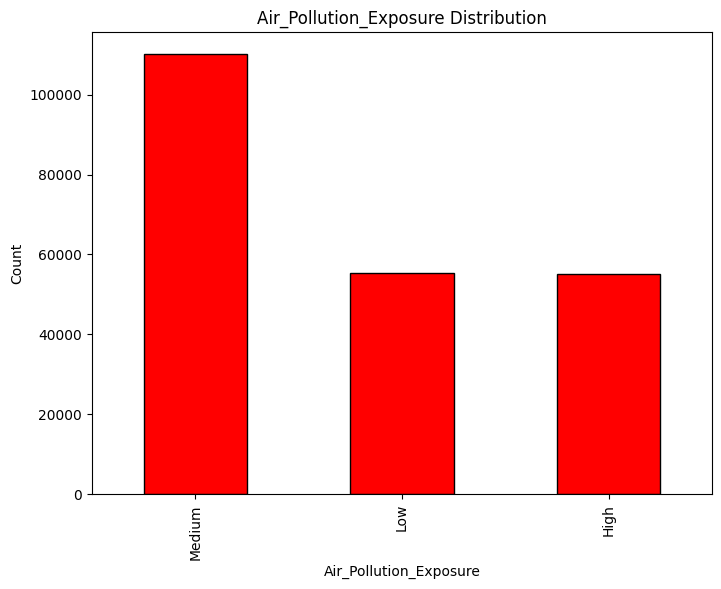

In [9]:
plt.figure(figsize = (8,6))
air_count = df["Air_Pollution_Exposure"].value_counts()
air_count.plot(kind = 'bar', color = 'red', edgecolor = 'black') 
plt.title('Air_Pollution_Exposure Distribution')
plt.xlabel('Air_Pollution_Exposure')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

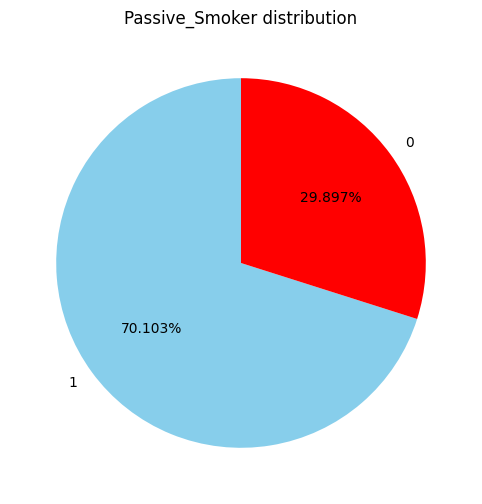

In [17]:
plt.figure(figsize = (8,6))
s_count = df["Passive_Smoker"].value_counts()
name = ['1', '0']
plt.pie(s_count, labels = name, autopct = '%1.3f%%', startangle = 90, colors = ['skyblue','red'])
plt.title("Passive_Smoker distribution")
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           220632 non-null  int64  
 1   Country                      220632 non-null  object 
 2   Population_Size              220632 non-null  int64  
 3   Age                          220632 non-null  int64  
 4   Gender                       220632 non-null  object 
 5   Smoker                       220632 non-null  object 
 6   Years_of_Smoking             220632 non-null  int64  
 7   Cigarettes_per_Day           220632 non-null  int64  
 8   Passive_Smoker               220632 non-null  object 
 9   Family_History               220632 non-null  object 
 10  Lung_Cancer_Diagnosis        220632 non-null  object 
 11  Survival_Years               220632 non-null  int64  
 12  Adenocarcinoma_Type          220632 non-null  object 
 13 

In [9]:
encoder = LabelEncoder()
df['Smoker'] = encoder.fit_transform(df['Smoker'])
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Passive_Smoker'] = encoder.fit_transform(df['Passive_Smoker'])
df['Family_History'] = encoder.fit_transform(df['Family_History'])
df['Lung_Cancer_Diagnosis'] = encoder.fit_transform(df['Lung_Cancer_Diagnosis'])
df['Adenocarcinoma_Type'] = encoder.fit_transform(df['Adenocarcinoma_Type']) 
df['Air_Pollution_Exposure'] = encoder.fit_transform(df['Air_Pollution_Exposure'])
df['Occupational_Exposure'] = encoder.fit_transform(df['Occupational_Exposure'])
df['Indoor_Pollution'] = encoder.fit_transform(df['Indoor_Pollution'])
df['Healthcare_Access'] = encoder.fit_transform(df['Healthcare_Access'])
df['Early_Detection'] = encoder.fit_transform(df['Early_Detection'])
df['Developed_or_Developing'] = encoder.fit_transform(df['Developed_or_Developing']) 
df['Country'] = encoder.fit_transform(df['Country'])   

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           220632 non-null  int64  
 1   Country                      220632 non-null  int64  
 2   Population_Size              220632 non-null  int64  
 3   Age                          220632 non-null  int64  
 4   Gender                       220632 non-null  int64  
 5   Smoker                       220632 non-null  int64  
 6   Years_of_Smoking             220632 non-null  int64  
 7   Cigarettes_per_Day           220632 non-null  int64  
 8   Passive_Smoker               220632 non-null  int64  
 9   Family_History               220632 non-null  int64  
 10  Lung_Cancer_Diagnosis        220632 non-null  int64  
 11  Survival_Years               220632 non-null  int64  
 12  Adenocarcinoma_Type          220632 non-null  int64  
 13 

In [11]:
df['Lung_Cancer_Diagnosis'].value_counts()

Lung_Cancer_Diagnosis
0    211671
1      8961
Name: count, dtype: int64

In [46]:
X = df[['Air_Pollution_Exposure', 'Passive_Smoker', 'Cigarettes_per_Day', 'Occupational_Exposure','Healthcare_Access','Early_Detection', 'Annual_Lung_Cancer_Deaths', 'Developed_or_Developing' ]]
y = df['Lung_Cancer_Diagnosis']

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           220632 non-null  int64  
 1   Country                      220632 non-null  int64  
 2   Population_Size              220632 non-null  int64  
 3   Age                          220632 non-null  int64  
 4   Gender                       220632 non-null  int64  
 5   Smoker                       220632 non-null  int64  
 6   Years_of_Smoking             220632 non-null  int64  
 7   Cigarettes_per_Day           220632 non-null  int64  
 8   Passive_Smoker               220632 non-null  int64  
 9   Family_History               220632 non-null  int64  
 10  Lung_Cancer_Diagnosis        220632 non-null  int64  
 11  Survival_Years               220632 non-null  int64  
 12  Adenocarcinoma_Type          220632 non-null  int64  
 13 

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree

In [49]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [50]:
acc = accuracy_score(y_test, y_pred)

In [51]:
print('DT Accuracy', acc)

DT Accuracy 0.9548802320574705


## Naive Bayes

In [52]:
model1 = GaussianNB()
model1.fit(X_train, y_train)


GaussianNB()

In [53]:
y_pred1 = model.predict(X_test)

In [54]:
acc1 = accuracy_score(y_test, y_pred1)
print('NB Accuracy:', acc1)

NB Accuracy: 0.9548802320574705


## Random Forest

In [55]:
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50, random_state=42)

In [56]:
y_pred2 = model.predict(X_test)

In [57]:
acc2 = accuracy_score(y_test, y_pred2)
print('NB Accuracy:', acc2)

NB Accuracy: 0.9554467786162667


## KNN

In [58]:
model  = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [59]:
y_pred2 = model.predict(X_test)

In [60]:
acc = accuracy_score(y_test, y_pred2)
print('KNN Accuracy:', acc)

KNN Accuracy: 0.9524327509234709


## Logistic Regression

In [62]:
log = LogisticRegression(max_iter=100)
log.fit(X_train, y_train)

/Users/raj/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
y_pred2 = log.predict(X_test)

In [64]:
acc = accuracy_score(y_test, y_pred2)
print('KNN Accuracy:', acc)

KNN Accuracy: 0.9584154825843588


## SVM